1. Data Collection and Preprocessing):
● Collect a dataset of labeled news articles (sports, politics, technology etc).
● Clean and preprocess the text data.
● Handle missing data, if any, and ensure the text is ready for feature extraction.

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  # Required by document

# 1. Load dataset (replace 'news_data.csv' with your file)
from google.colab import files
uploaded = files.upload()  # Manually select your file
data = pd.read_csv(next(iter(uploaded)))
data = pd.read_csv("news_data.csv")

# 2. Check for missing values (required in document)
print("Missing values:\n", data.isnull().sum())

# 3. Text cleaning (document specifies: stopwords, punctuation, lemmatization)
def clean_text(text):
    # Remove special characters (punctuation handling)
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    # Lowercase (standard preprocessing)
    text = text.lower()
    # Stopword removal (explicitly mentioned in document)
    words = [word for word in text.split()
             if word not in stopwords.words('english')]
    return ' '.join(words)

data['cleaned_text'] = data['headline'].apply(clean_text)  # Using 'headline' as per your columns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving news_data.csv to news_data (1).csv
Missing values:
 category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64


2. Feature Extraction :
● Use methods like TF-IDF, word embeddings (e.g., Word2Vec, GloVe), or
bag-of-words to convert text data into numerical features.
● Perform exploratory data analysis (EDA) to understand the distribution of different
categories.


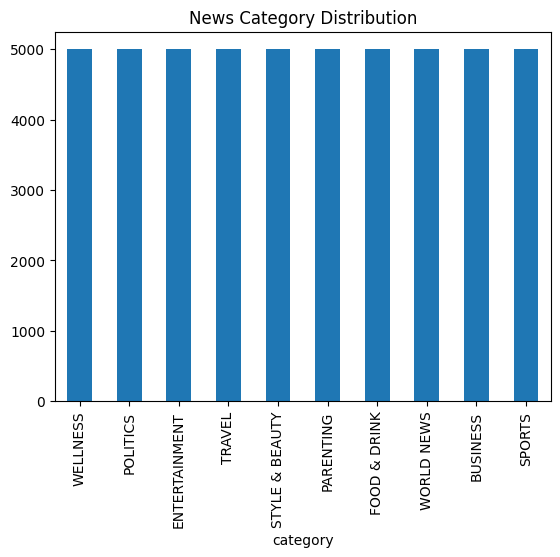

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. TF-IDF (explicitly mentioned in document)
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_text'])
y = data['category']

# 2. EDA: Category distribution (required in document)
data['category'].value_counts().plot(kind='bar')
plt.title("News Category Distribution")
plt.show()

Model Development and Training :
● Build classification models using algorithms like Logistic Regression, Naive Bayes,
Support Vector Machines (SVM).
● Train the models on the preprocessed text data, tuning hyperparameters as
necessary.
● Use cross-validation to ensure robust evaluation of model performance.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Naive Bayes", MultinomialNB()),
    ("SVM", SVC(kernel='linear'))
]

# Cross-validation (as specified in document)
for name, model in models:
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} Accuracy: {scores.mean():.2f} (±{scores.std():.2f})")

Logistic Regression Accuracy: 0.72 (±0.00)
Naive Bayes Accuracy: 0.71 (±0.00)
SVM Accuracy: 0.71 (±0.00)


4. Model Evaluation :
● Evaluate the models using appropriate metrics.
● Compare the performance of different models and select the best one for
classification.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model (SVM)
model = SVC(kernel='linear').fit(X_train, y_train)

# Generate and print the classification report
print(classification_report(y_test, model.predict(X_test)))


                precision    recall  f1-score   support

      BUSINESS       0.62      0.73      0.67       955
 ENTERTAINMENT       0.71      0.76      0.73       985
  FOOD & DRINK       0.82      0.75      0.78      1021
     PARENTING       0.73      0.67      0.70      1030
      POLITICS       0.70      0.65      0.67      1034
        SPORTS       0.85      0.85      0.85       995
STYLE & BEAUTY       0.84      0.79      0.81       986
        TRAVEL       0.75      0.71      0.73      1008
      WELLNESS       0.57      0.66      0.61      1009
    WORLD NEWS       0.75      0.72      0.73       977

      accuracy                           0.73     10000
     macro avg       0.73      0.73      0.73     10000
  weighted avg       0.73      0.73      0.73     10000

